In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/trajectory-inference-single-cell-rna-seq/GSE90047_Mouse_Liver_Hepatoblast_invivo.csv


In [10]:
import pandas as pd
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 
import pprint

# Load and visualise data

In [11]:
df = pd.read_csv('/kaggle/input/trajectory-inference-single-cell-rna-seq/GSE90047_Mouse_Liver_Hepatoblast_invivo.csv', index_col = 0)
df

,Gnai3,Cdc45,H19,Scml2,Apoh,Narf,Cav2,Klf6,Scmh1,Cox5a,...,RP24.170M24.1,Olfr1034,RP24.423J19.6,RP24.245K18.4,RP24.217M7.4,RP24.80P7.1,RP24.288C12.4,RP23.293N22.1,Rpsa.ps1,RP23.277E3.2
E10.5D_1_01,1.231591,1.364801,2.693362,0.000000,0.064855,0.236972,0.000000,0.148181,0.134688,2.024282,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
E10.5D_1_02,1.430554,0.309266,2.908480,0.000000,0.021315,0.614207,0.000000,0.264341,0.286178,2.467979,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.028546,0.0
E10.5D_1_03,1.048229,1.194527,2.421834,0.093663,0.222664,0.172901,0.000000,0.000000,0.057648,2.381758,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
E10.5D_1_04,1.060188,1.197889,2.198268,0.000000,0.019601,0.307439,0.000000,0.107572,0.039366,2.559187,...,0.000000,0.0,0.0,0.0,0.112583,0.0,0.133123,0.000000,0.000000,0.0
E10.5D_1_05,1.501401,0.479980,2.068513,0.000000,0.081355,0.140239,0.000000,0.000000,0.165819,1.766382,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.018349,0.000000,0.027875,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E17.5E_4_12,1.089324,0.000000,3.653168,0.000000,5.919322,0.341236,0.000000,0.209368,0.195397,1.540586,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
E17.5E_4_13,1.160029,0.133275,3.235022,0.000000,6.304276,0.668972,0.000000,0.011741,0.007085,1.799074,...,0.030637,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
E17.5E_4_14,0.713107,0.211438,2.994423,0.000000,4.267982,0.258988,0.220316,0.062832,0.159106,1.397065,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.061139,0.030317,0.0
E17.5E_4_15,1.150703,0.000000,3.521781,0.000000,2.167369,0.398914,0.000000,0.195677,0.043783,1.552647,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0


In [34]:
df.index[0][1:6]

'10.5D'

In [42]:
# Extract Timing label from data index

y = [float(df.index[i][1:5]) for i in range(len(df.index)) ]
y = np.array(y)
#np.unique(y)
pd.Series(y).value_counts()

15.5    77
17.5    70
14.5    70
11.5    70
13.5    65
10.5    54
12.5    41
dtype: int64

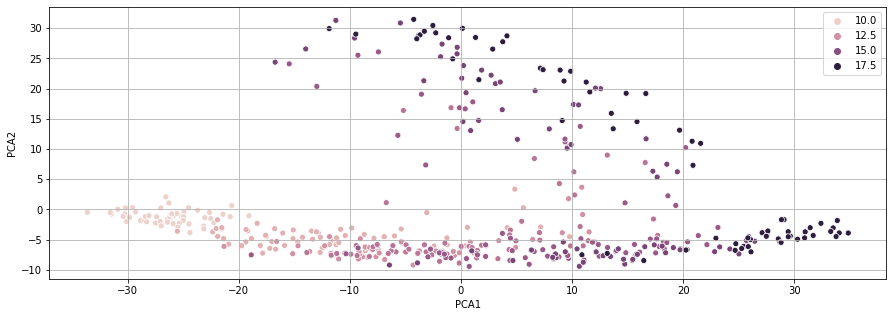

In [39]:
from sklearn.decomposition import PCA

fig = plt.figure(figsize = (15,5))
data2 = PCA().fit_transform(df)
#plt.scatter(data2[:,0],data2[:,1], c= y , alpha = 0.9)# ,cmap=plt.cm.Paired) # ,c=np.array(irx)  , linewidth = data_linewidth
sns.scatterplot(x = data2[:,0],y = data2[:,1], hue=y)
plt.grid()
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


# Functions for MST trajectories construction and visualization

In [13]:
#from sklearn.cluster import DBSCAN, KMeans, OPTICS, SpectralClustering
from sklearn.cluster import  KMeans,  SpectralClustering # DBSCAN, OPTICS,
import umap
import numpy as np
from sklearn.neighbors import kneighbors_graph
from scipy.sparse.csgraph import minimum_spanning_tree
from sklearn.decomposition import PCA

def create_tree_by_cluster_knn_mst(X, n_clusters='sqrt', n_neighbors= 10,   verbose =  0, clustering_method = 'Kmeans' ):
  '''
  # Calcuates a tree approximation for given dataset X, by kmeans+knn+mst
  # 
  #' @param n_clusters number of clusters for clustering or 'sqrt' - square root of dataset size
  #' @param n_neighbors used by knn-graph step
  #
  #' @return
  # dict_result - dictionary with results:
  #   dict_result['csr_mst'] # adjancy matrix of MST graph in csr format (column sparse matrix - scipy )
  #   dict_result['edges_mst'] # edges matrix of MST graph, shape = n_nodes X 2 , each row contains ends of the correspoding edges
  #   dict_result['nodes_positions']  graph nodes positions
  #   dict_result['predicted_clusters'] vector with cluster number for each point of  input X
  #   dict_result['csr_knn'] same as 'csr_mst', but for intermediate knn-graph  
  #   dict_result['edges_knn'] same as 'edges_mst', but for intermediate knn-graph 
  # 
  #' @examples
  # X = np.random.rand(1000,10)
  # dict_result =  create_tree_by_cluster_knn_mst(X)# - Calcuates a tree for given dataset, by kmeans+knn+mst
  # edges =  dict_result['edges_mst']
  # nodes_positions = dict_result['nodes_positions']
  # plot_graph(edges, nodes_positions, data = X)
  # plt.show()  
  '''
  if n_clusters == 'sqrt':
    n_clusters = int( np.sqrt(X.shape[0] ) ) 

  #print("clustering_method.lower() == 'Spectral'.lower()", clustering_method.lower() == 'Spectral'.lower() )
  if isinstance(clustering_method ,str) and ( clustering_method.lower() == 'Spectral'.lower() ):
    clustering = SpectralClustering(n_clusters=n_clusters, random_state=0).fit(X)
    predicted_clusters = clustering.labels_ # kmeans.predict(X)
    # Get cluster centers by averaging:
    l = len(np.unique(predicted_clusters))
    cluster_centers_ = np.zeros( (l, X.shape[1]))
    for i,v in  enumerate(np.unique(predicted_clusters)):
      m = predicted_clusters==v 
      cluster_centers_[i,:] = np.mean(X[m,:],axis = 0 )
  else: # Kmeans clustering by defualt:
    clustering = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    cluster_centers_ = clustering.cluster_centers_
  predicted_clusters = clustering.labels_ # kmeans.predict(X)

  if verbose >= 100:
    print('cluster_centers_[:2,:]', cluster_centers_[:2,:])
    print('predicted_clusters.shape', predicted_clusters.shape)
    print('predicted_clusters[:2]', predicted_clusters[:2])

  # sklearn.neighbors.kneighbors_graph(X, n_neighbors, mode='connectivity', metric='minkowski', p=2, metric_params=None, include_self=False, n_jobs=None)[source]¶
  if n_neighbors > len(cluster_centers_):
    n_neighbors = len(cluster_centers_) # To avoid exception for small number of clusters 
  csr_knn = kneighbors_graph(cluster_centers_, n_neighbors= n_neighbors, mode= 'distance', include_self=True) # mode=  'connectivity'
  if verbose >= 100:
    print('csr_knn', type(csr_knn), csr_knn.shape)

  csr_mst = minimum_spanning_tree(csr_knn)
  if verbose >= 100:
    print('csr_mst', type(csr_mst),csr_mst.shape)

  dict_result = {}
  dict_result['csr_mst'] = csr_mst
  dict_result['csr_knn'] = csr_knn
  dict_result['nodes_positions'] = cluster_centers_
  dict_result['predicted_clusters'] = predicted_clusters
  dict_result['edges_mst'] = get_edges_from_adj_matrix( csr_mst )
  dict_result['edges_knn'] = get_edges_from_adj_matrix( csr_knn )

  return dict_result

def get_edges_from_adj_matrix( adj_matrix ):
  '''
  #' From adjacency matrix construct an edge list
  #' either [k1,k2]!=0 or [k2,k1]!=0, causes edge (k1,k2)
  #'
  #' @param  adj_matrix - adjacency matrix of an unoriented graph
  #'
  #' @return numpy.ndarray of shape Nx2, containing vertices for each edge 
  #'    
  #' @examples
  #' adj_matrix = np.array([[0,1,1],[0,0,0],[0,2,0]])
  #' edges = get_edges_from_adj_matrix( adj_matrix )
  '''
  list_edges = []
  n_vertex = adj_matrix.shape[0]
  for k1 in range(  n_vertex  ) :
    for k2 in range(k1, n_vertex ) :
      if ( adj_matrix[k1,k2] != 0) or (adj_matrix[k2,k1] != 0):
          list_edges.append( (k1,k2) )
  return np.array(list_edges)

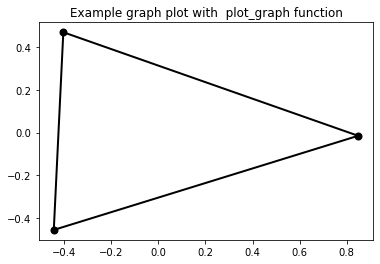

In [14]:
from sklearn.decomposition import PCA
try :
    import umap
except:
    print('cannot import umap')

def plot_graph(edges, nodes_positions, data = None, dim_reduction = 'PCA', graph_color = 'black', graph_linewidth=2, 
               plot_data = True, data_linewidth = 1,  data_color = 'tab:red', data_transparency_alpha = 0.9,
               umap_n_neighbors = 50, umap_min_dist = 0.99):
  '''
  #' Plots graphs defined by edges and nodes_positions, optionally - scatter plot the "data" on the same plot,
  #' Optionally performs PCA/etc (depending on dim_reduction)
  #'
  #' @param edges Nx2-shape matrix with edges ends, i.e. edges[k,0], edges[k,1] - ends of k-th edge  
  #' @param nodes_positions  matrix of nodes positions 
  #' @param data  "original dataset", basically arbitrary dataset for scatter plot, it should have same shape[1] as nodes_positions
  #' @param plot_data  True/False - to scatterplot or not data
  #' @param dim_reduction  'PCA', 'plot_first2axis', 'umap'
  #' @param data_color can be a vector or predefined color - argument for c = data_color in scatter

  #' @examples
  # edges = np.array([ [0,1],[1,2],[2,0] ] )
  # nodes_positions = np.random.rand(3,10) # 3 points in 10d space
  # plot_graph(edges, nodes_positions)
  #
  # t = elpigraph_output
  # edges = t[0]['Edges'][0]
  # nodes_positions = t[0]['NodePositions']
  # plot_graph(edges, nodes_positions)
  '''
  str_dim_reduction = dim_reduction
  if dim_reduction in ['PCA', 'umap' ]: #  not 'plot_first2axis':
    if dim_reduction.upper() == 'PCA':
      reducer = PCA()
    elif dim_reduction.lower() == 'umap':
      n_neighbors = umap_n_neighbors#  50
      min_dist= umap_min_dist # 0.99
      #n_components=n_components
      reducer = umap.UMAP( n_neighbors=n_neighbors,        min_dist=min_dist, n_components = 2)

    if data is not None:
      data2 = reducer.fit_transform(data)
      if plot_data == True:
        if data_color is None:
          plt.scatter(data2[:,0],data2[:,1], linewidth = data_linewidth , alpha = data_transparency_alpha)# ,cmap=plt.cm.Paired) # ,c=np.array(irx) 
          plt.xlabel(str_dim_reduction+'1')
          plt.ylabel(str_dim_reduction+'2')
        else:
          plt.scatter(data2[:,0],data2[:,1] ,cmap=plt.cm.Paired,c= data_color, linewidth = data_linewidth, alpha = data_transparency_alpha ) 
          plt.xlabel(str_dim_reduction+'1')
          plt.ylabel(str_dim_reduction+'2')
    else:
      reducer.fit(nodes_positions)

    nodes_positions2 = reducer.transform( nodes_positions )
  else:
    if plot_data == True:
      if data is not None:
        if data_color is None:
          plt.scatter(data[:,0],data[:,1] , linewidth = linewidth, alpha = data_transparency_alpha )# ,cmap=plt.cm.Paired) # ,c=np.array(irx) 
        else:
          plt.scatter(data[:,0],data[:,1] ,cmap=plt.cm.Paired,c= data_color , linewidth = data_linewidth, alpha = data_transparency_alpha ) 
    nodes_positions2 = nodes_positions

  plt.scatter(nodes_positions2[:,0],nodes_positions2[:,1],c = graph_color, linewidth = graph_linewidth)#, cmap=plt.cm.Paired)

  edgeCount = edges.shape[0]
  for k in range(edgeCount):
    n0 = edges[k,0]
    n1 = edges[k,1]
    x_line = [ nodes_positions2[n0,0],  nodes_positions2[n1,0] ]
    y_line = [ nodes_positions2[n0,1],  nodes_positions2[n1,1] ]
    plt.plot(x_line, y_line, graph_color, linewidth = graph_linewidth) # 'black')

    
edges = np.array([ [0,1],[1,2],[2,0] ] )
nodes_positions = np.random.rand(3,10) # 3 points in 10d space
plot_graph(edges, nodes_positions)
plt.title('Example graph plot with  plot_graph function')
plt.show()

# Trajectories by MST

In [18]:
from sklearn.decomposition import PCA
X = df.values
X = PCA().fit_transform(X)
X = X[:,:50]

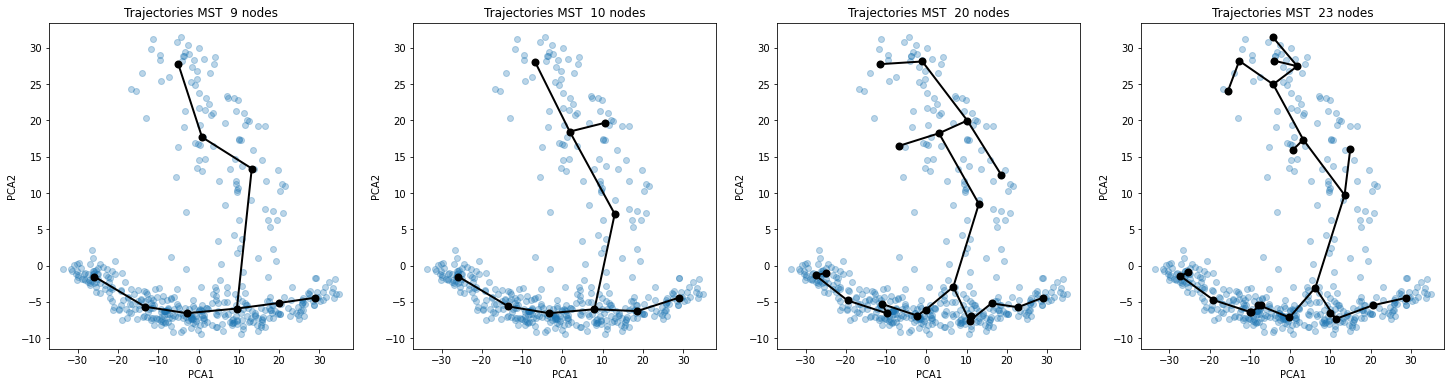

<Figure size 1800x432 with 0 Axes>

In [51]:
t0 = time.time()
c = 0
fig = plt.figure(figsize = (25,6) )
for n_clusters in [9,10,20,23]: #  [2,25]: # range(0):
  c+=1
  n_neighbors = n_clusters 
  dict_result =  create_tree_by_cluster_knn_mst(X, n_clusters = n_clusters, n_neighbors=n_neighbors)# - Calcuates a tree for given dataset, by kmeans+knn+mst
  edges =  dict_result['edges_mst']
  nodes_positions = dict_result['nodes_positions']

  fig.add_subplot(1,4,c)
  plot_graph(edges, nodes_positions, data = X , data_color = 'tab:blue', data_transparency_alpha = 0.3 )
  plt.title('Trajectories MST  '+ str(n_clusters) + ' nodes' )
  #plt.show()  

  if c%4 == 0:
    plt.show()
    fig = plt.figure(figsize = (25,6) )
    c = 0



# Trajectories by ElPiGraph

In [22]:
!pip install  --no-dependencies  git+https://github.com/j-bac/elpigraph-python.git

  Cloning https://github.com/j-bac/elpigraph-python.git to /tmp/pip-req-build-1oaimr5a
  Created wheel for elpigraph-python: filename=elpigraph_python-0.1.0-py3-none-any.whl size=86889 sha256=f1e58cdb9bd00ed312c306db7e11d1df5c4bb280ccf5e9eb36f9bcdd09e5e212
  Stored in directory: /tmp/pip-ephem-wheel-cache-zkw5v547/wheels/79/fc/a4/52027e414f1ebe30d37db5ece4b4cd1680fa35b6e256bbf356
Successfully built elpigraph-python


In [23]:
import elpigraph

Generating the initial configuration
Creating a chain in the 1st PC with 2 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
50 dimensions are being used
100.0 % of the original variance has been retained
The elastic matrix is being used. Edge configuration will be ignored
Computing EPG with  9  nodes on  447  points and  50  dimensions
Nodes =  2 3 4 5 6 7 8 

BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

1||9	195.355	9	8	5	1	0	0	176.781	167.8535	0.6894	0.7051	13.4896	5.0845	45.7605	411.8446	0


0.4334  seconds elapsed
Generating the initial configuration
Creating a chain in the 1st PC with 2 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
50 dimensions are being used
100.0 % of the original variance has been retained
The elastic matrix is bei

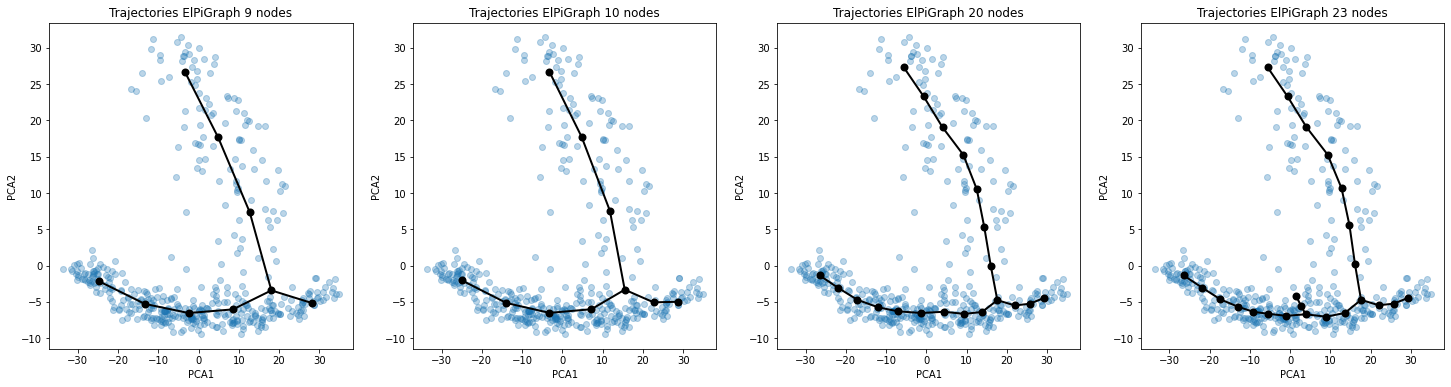

<Figure size 1800x432 with 0 Axes>

In [50]:

t0 = time.time()
c = 0
fig = plt.figure(figsize = (25,6) )
for n_nodes in [9,10,20,23]: #  [2,25]: # range(0):
    c+=1
    
    tree_elpi = elpigraph.computeElasticPrincipalTree(X , NumNodes=n_nodes, 
      alpha=0.01,FinalEnergy='Penalized', StoreGraphEvolution = True )#,

    nodes_positions = tree_elpi[0]['NodePositions'] # ['AllNodePositions'][k]
    matrix_edges_weights = tree_elpi[0]['ElasticMatrix'] # ['AllElasticMatrices'][k]
    matrix_edges_weights = np.triu(matrix_edges_weights,1 )
    edges = np.array( np.nonzero(matrix_edges_weights), dtype = int ).transpose()

    fig.add_subplot(1,4,c)
    plot_graph(edges, nodes_positions, data = X , data_color = 'tab:blue', data_transparency_alpha = 0.3 )
    plt.title('Trajectories ElPiGraph ' + str(n_nodes)+' nodes');
    #plt.show()  

    if c%4 == 0:
        plt.show()
        fig = plt.figure(figsize = (25,6) )
        c = 0

# Functions for splitting graph into segments and clustering dataset accordingly

In [25]:
import igraph
def partition_data(Xcp, NodePositions, MaxBlockSize = 10**6,SquaredXcp= None,
                  TrimmingRadius=float('inf')):
    '''
    # Partition the data by proximity to graph nodes
    # (same step as in K-means EM procedure)
    #
    # Inputs:
    #   X is n-by-m matrix of datapoints with one data point per row. n is
    #       number of data points and m is dimension of data space.
    #   NodePositions is k-by-m matrix of embedded coordinates of graph nodes,
    #       where k is number of nodes and m is dimension of data space.
    #   MaxBlockSize integer number which defines maximal number of
    #       simultaneously calculated distances. Maximal size of created matrix
    #       is MaxBlockSize-by-k, where k is number of nodes.
    #   SquaredX is n-by-1 vector of data vectors length: SquaredX = sum(X.^2,2);
    #   TrimmingRadius (optional) is squared trimming radius.
    #
    # Outputs
    #   partition is n-by-1 vector. partition[i] is number of the node which is
    #       associated with data point X[i, ].
    #   dists is n-by-1 vector. dists[i] is squared distance between the node with
    #       number partition[i] and data point X[i, ].
    '''
    if SquaredXcp is None:
      SquaredXcp = np.sum(Xcp**2,1)[:,np.newaxis]
    NodePositionscp = np.asarray(NodePositions)
    n = Xcp.shape[0]
    partition = np.zeros((n, 1), dtype=int)
    dists = np.zeros((n, 1))
    all_dists = np.zeros((n, NodePositions.shape[0] ))
    # Calculate squared length of centroids
    cent = NodePositionscp.T
    centrLength = (cent**2).sum(axis=0)
    # Process partitioning without trimming
    for i in range(0, n, MaxBlockSize):
        # Define last element for calculation
        last = i+MaxBlockSize
        if last > n:
            last = n
        # Calculate distances
        d = SquaredXcp[i:last] + centrLength-2*np.dot(Xcp[i:last, ], cent)
        tmp = d.argmin(axis=1)
        partition[i:last] = tmp[:, np.newaxis]
        dists[i:last] = d[np.arange(d.shape[0]), tmp][:, np.newaxis]
        all_dists[i:last,:] = d
    # Apply trimming
    if not np.isinf(TrimmingRadius):
        ind = dists > (TrimmingRadius**2)
        partition[ind] = -1
        dists[ind] = TrimmingRadius**2
    
    
    return np.asarray(partition), np.asarray(dists), np.asarray(all_dists)



def find_branches( graph, verbose = 0 ):
  '''
  #' Computes "branches" of the graph, i.e. paths from branch vertex (or terminal vertex)  to branch vertex (or terminal vertex)
  #' Can process disconnected graphs. Stand-alone point - is "branch".
  #' Circle is exceptional case - each circle (can be several connected components) is "branch"
  #'
  #' @param g - graph (igraph) 
  #' @param verbose - details output
  #' 
  #' @examples
  #' import igraph
  #' g = igraph.Graph.Lattice([3,3], circular = False ) 
  #' dict_output = find_branches(g, verbose = 1000)
  #' print( dict_output['branches'] )
  '''
  #verbose = np.inf
  #
  g = graph
  n_vertices_input_graph =   g.vcount()  
  set_vertices_input_graph = set( range( n_vertices_input_graph  ) ) 

  dict_output = {}
  #dict_output['branches'] = found_branches.copy()

  # Main variables for process: 
  found_branches = []
  processed_edges = []
  processed_vertices = set()

  ############################################################################################################################################
  # Connected components loop:
  count_connected_components = 0 
  while True: # Need loop if graph has several connected components, each iteration - new component
    count_connected_components += 1

    def find_start_vertex(g, processed_vertices ): 
      '''
      #' Find starting vertex for branches-search algorithm. 
      #' It should be either branching vertex (i.e. degree >2) or terminal vertex (i.e. degree 0 or 1), in special case when unprocessed part of graph is union of circles - processed outside function
      '''
      n_vertices = n_vertices_input_graph #  = g.count()# 
      if n_vertices == len( processed_vertices ):
        return -1,-1 # All vertices proccessed
      flag_found_start_vertex = 0 
      for v in set_vertices_input_graph: 
        if v in processed_vertices: continue
        if g.degree(v) != 2:
          flag_found_start_vertex = 1
          return v, flag_found_start_vertex
      return -1, 0 # All unprocessed vertices are of degree 2, that means graph is circle of collection or collection of circles

    ############################################################################################################################################
    # Starting point initialization. End process condtion.
    #
    # Set correctly the starting vertex for the algorithm
    # That should be branch vertex or terminal vertex, only in case graph is set of circles(disconnected) we take arbitrary vertex as initial, each circle will be a branch
    initial_vertex, flag_found_start_vertex = find_start_vertex(g, processed_vertices )
    if   flag_found_start_vertex > 0:
      current_vertex  = initial_vertex
    elif flag_found_start_vertex == 0: # All unprocessed vertices are of degree 2, that means graph is circle of collection or collection of circles
      # Take any unprocessed element 
      tmp_set = set_vertices_input_graph  - processed_vertices
      current_vertex = tmp_set.pop()
    else:
      # No vertices to process 
      if verbose >= 10:
        print('Process finished')
      dict_output['branches'] = found_branches.copy()
      return dict_output
      #break

    ############################################################################################################################################
    # Core function implementing "Breath First Search" like algorithm
    # with some updates in storage, since we need to arrange edges into "branches"
    def find_branches_core( current_vertex , previous_vertex, current_branch  ):
      core_call_count[0] = core_call_count[0] + 1
      if verbose >= 1000:
        print(core_call_count[0], 'core call.', 'current_vertex', current_vertex , 'previous_vertex', previous_vertex,'found_branches',found_branches, 'current_branch',current_branch )

      processed_vertices.add(current_vertex)
      neis = g.neighbors(current_vertex) 
      if len(neis) == 0: # current_vertex is standalone vertex
        found_branches.append( [current_vertex] )
        return 
      if len(neis) == 1: # current_vertex is terminal vertex
        if neis[0] == previous_vertex:
          current_branch.append( current_vertex  )
          found_branches.append( current_branch.copy() )
          # processed_edges.append(  set([current_vertex , previous_vertex])  )  
          return 
        else:
          # That case may happen if we just started from that vertex
          # Because it has one neigbour, but it is not previous_vertex, so it is None, which is only at start 
          current_branch = [current_vertex] # , neis[0] ] # .append( current_vertex  )
          processed_edges.append(  set([current_vertex , neis[0] ])  )
          find_branches_core( current_vertex = neis[0] , previous_vertex = current_vertex, current_branch = current_branch )  
          return
      if len(neis) == 2: # 
        # continue the current branch:
        current_branch.append( current_vertex  )
        next_vertex = neis[0]
        if next_vertex == previous_vertex: next_vertex = neis[1]
        if next_vertex in processed_vertices: # Cannot happen for trees, but may happen if graph has a loop
          if set([current_vertex , next_vertex]) not in processed_edges:
            current_branch.append( next_vertex  )
            found_branches.append( current_branch.copy() )
            processed_edges.append(  set([current_vertex , next_vertex])  )
            return 
          else:
            return
        processed_edges.append(  set([current_vertex , next_vertex])  )          
        find_branches_core( current_vertex=next_vertex , previous_vertex = current_vertex, current_branch = current_branch )
        return
      if len(neis)  > 2 : #Branch point
        if  previous_vertex is not None:
          # Stop current branch
          current_branch.append( current_vertex  )
          found_branches.append(current_branch.copy())
        for next_vertex in neis:
            if next_vertex ==  previous_vertex:    continue
            if next_vertex in  processed_vertices: # Cannot happen for trees, but may happen if graph has a loop
              if set([current_vertex , next_vertex]) not in processed_edges:
                processed_edges.append(  set([current_vertex , next_vertex])  )
                found_branches.append( [current_vertex, next_vertex ] )
              continue
            current_branch = [current_vertex]
            processed_edges.append(  set([current_vertex , next_vertex])  )
            find_branches_core( current_vertex = next_vertex , previous_vertex = current_vertex , current_branch = current_branch)
      return

    ############################################################################################################################################
    # Core function call. It should process the whole connected component
    if verbose >= 10:
      print('Start process count_connected_components', count_connected_components, 'initial_vertex', current_vertex)
    processed_vertices.add(current_vertex)
    core_call_count = [0]
    find_branches_core( current_vertex = current_vertex , previous_vertex = None , current_branch = [])

    ############################################################################################################################################
    # Output of results for connected component
    if verbose >=10:
      print('Connected component ', count_connected_components, ' processed ')
      print('Final found_branches',found_branches)
      print('N Final found_branches', len( found_branches) )


def branch_labler( X , graph, nodes_positions, verbose = 0 ):
  '''
  #' Labels points of the dataset X by "nearest"-"branches" of graph.
  #' 
  #'
  #' @examples
  # X = np.array( [[0.1,0.1], [0.1,0.2], [1,2],[3,4],[5,0]] )
  # nodes_positions = np.array( [ [0,0], [1,0], [0,1], [1,1] ]  ) 
  # import igraph
  # g = igraph.Graph(); g.add_vertices(  4  )
  # g.add_edges([[0,1],[0,2],[0,3]])
  # vec_labels_by_branches = branch_labler( X , g, nodes_positions )
  '''
  #####################################################################################
  # Calculate branches and clustering by vertices of graph 
  dict_output = find_branches(graph, verbose = verbose )
  if verbose >=100:
    print('Function find_branches results branches:',  dict_output['branches'] )
  vec_labels_by_vertices, dists, all_dists = partition_data(X, nodes_positions) # np.array([[1,2,3,4], [1,2,3,4], [1,2,3,4], [10,20,30,40]]), [[1,2,3,4], [10,20,30,40]], 10**6)#,SquaredX)
  vec_labels_by_vertices = vec_labels_by_vertices.ravel()
  if verbose >=100:
    print('Function partition_data returns: vec_labels_by_vertices.shape, dists.shape, all_dists.shape', vec_labels_by_vertices.shape, dists.shape, all_dists.shape )
  #####################################################################################

  n_vertices = len( nodes_positions)
  branches = dict_output['branches']

  #####################################################################################
  # Create dictionary vertex to list of branches it belongs to  
  dict_vertex2branches = {}
  for i,b in enumerate( branches):
    for v in b:
      if v in dict_vertex2branches.keys():
        dict_vertex2branches[v].append(i)
      else:
        dict_vertex2branches[v] = [i]
  if verbose >=100:
    print( 'dict_vertex2branches', dict_vertex2branches )


  #####################################################################################
  # create list of branch and non-branch vertices
  list_branch_vertices = []
  list_non_branch_vertices = []
  for v in dict_vertex2branches:
    list_branches = dict_vertex2branches[v]
    if len(list_branches) == 1:
      list_non_branch_vertices.append(v)
    else:
      list_branch_vertices.append(v)
  if verbose >=100:  
    print('list_branch_vertices, list_non_branch_vertices', list_branch_vertices, list_non_branch_vertices)

  #####################################################################################
  # First stage of creation of final output - create labels by branches vector 
  # After that step it will be only correct for non-branch points 
  vec_vertex2branch = np.zeros(  n_vertices  ) 
  for i in range( n_vertices  ):
    vec_vertex2branch[i] = dict_vertex2branches[i][0]
  vec_labels_by_branches = vec_vertex2branch[ vec_labels_by_vertices ] 
  if verbose >= 100:
    print('branches', branches)
    print('vec_labels_by_branches', vec_labels_by_branches)

  #####################################################################################
  # Second stage of creation of final output - 
  # make correct calculation for branch-vertices create labels by correct branches 
  for branch_vertex in list_branch_vertices:
    if verbose >= 100:
      print('all_dists.shape', all_dists.shape)
    def labels_for_one_branch_vertex( branch_vertex , vec_labels_by_vertices,  all_dists ):
      '''
      #' For the branch_vertex re-labels points of dataset which were labeled by it to label by "correct branch".
      #' "Correct branch" label is a branch 'censored'-nearest to given point. 
      #' Where 'censored'-nearest means the minimal distance between the point  and all points of the branch except the given branch_vertex
      #'
      #' Function changes vec_labels_by_branches defined above
      #' Uses vec_labels_by_vertices defined above - vector of same length as dataset, which contains labels by vertices 
      '''

      mask = vec_labels_by_vertices.ravel() == branch_vertex # Select part of the dataset which is closest to branch_vertex

      # Allocate memory for array: first coordinate - point of dataset[mask],  second coordinate - branch number , for all branches contianing given vertex (i.e. branch_vertex) 
      # For each point of dataset[mask] it contains 'censored'-distances to "branches" adjoint to "branch_vertex", 
      # 'censored' means minimal over vertices belonging to  distance to branches (excluding branch_vertex)
      dist2branches = np.zeros( [ mask.sum(), len(dict_vertex2branches[branch_vertex] )  ] )
      list_branch_ids = [] # that will be necessary to renumerate local number to branch_ids 
      for i,branch_id in enumerate( dict_vertex2branches[branch_vertex] ):
        list_branch_ids.append(branch_id)
        # Create list of vertices of current branch, with EXCLUSION of branch_vertex
        branch_vertices_wo_given_branch_vertex = [v for v in branches[branch_id] if v != branch_vertex ]
        # For all points of dataset[mask] calculate minimal distances to given branch (with exclusion of branch_point), i.e. mininal difference for  
        if verbose >= 1000:
          print('mask.shape, all_dists.shape', mask.shape, all_dists.shape)
        dist2branches[ : ,i ] = np.min( all_dists[mask,:][:,branch_vertices_wo_given_branch_vertex], 1 ).ravel()

      vec_labels_by_branches[mask] = np.array(list_branch_ids)[ np.argmin( dist2branches, 1) ]
    labels_for_one_branch_vertex( branch_vertex, vec_labels_by_vertices,  all_dists  )

    if verbose >= 10:    
      print('Output: vec_labels_by_branches', vec_labels_by_branches)


  return vec_labels_by_branches


In [26]:
from sklearn import metrics
import pandas as pd 

def compare_clusterings(y, y_pred, X = None,  df_report = None, df_report_colomn_name = None, list_scores = 'All'):
  if df_report is None:
    df_report = pd.DataFrame()
  if df_report_colomn_name  is None:
    df_report_colomn_name  = df_report.shape[1]+1
  
  list_scores_ids_require_ground_truth = ['adjusted_rand_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score',
                'homogeneity_score', 'completeness_score',  'v_measure_score', 'v_measure06_score', 'fowlkes_mallows_score',
                   ]
  list_scores_ids_not_require_ground_truth = ['inertia_score', 'silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score'  ]
  if list_scores == 'All':
    list_full = list_scores_ids_require_ground_truth + list_scores_ids_not_require_ground_truth
  else:
    list_full = list_scores

    
  def inertia_score(X, y):
    b = X.copy()
    for v in np.unique(y):
      #print(v)
      b[y==v,:] = np.mean(X[y==v,:],axis = 0) #[10,10])
    #print(b)
    return np.sum( np.sum( (X-b)**2 , 1) )  

  s = ''
  for score_id in list_full:
    #print(score_id)
    if (y is None) and (score_id in list_scores_ids_require_ground_truth):
        continue
    if score_id in list_scores_ids_require_ground_truth:
      if score_id not in ['v_measure06_score']:
        func_score  = getattr(metrics, score_id )
        m = func_score(y, y_pred)
      else:
        m = metrics.v_measure_score(y, y_pred, beta = 0.6)
    elif (score_id in list_scores_ids_not_require_ground_truth) and (X is not None):
      if score_id not in ['inertia_score']:
        if len(np.unique( y_pred )) > 1: # silu
          func_score  = getattr(metrics, score_id )
          m = func_score(X, y_pred)
        else:
          if score_id in ['silhouette_score',  'davies_bouldin_score']:
            m = 0
          elif score_id in ['calinski_harabasz_score']:
            m = np.inf
          else:
            # raise ValueError('unexpected score id')
            func_score  = getattr(metrics, score_id )
            m = func_score(X, y_pred)
      elif X is not None:
        m = inertia_score(X, y_pred)
    else:
      continue
    str_score_inf = score_id.replace('_score','') 
    #print(str_score_inf)
    s += str_score_inf + ' ' + ('%0.3f')%(m) + '\n'
    df_report.loc[str_score_inf, df_report_colomn_name ] = m

  return s,df_report 


# Calculation and analysis of unsupervised trajectory scores

## MST

In [52]:

t0 = time.time()
df_stat = pd.DataFrame()
c = 0
fig = plt.figure(figsize = (25,10) )
for n_nodes in range(3,30): #  [2,25]: # range(0):
  c+=1
  dict_result =  create_tree_by_cluster_knn_mst(X, n_clusters = n_nodes, n_neighbors=n_nodes)# - Calcuates a tree for given dataset, by kmeans+knn+mst
  edges =  dict_result['edges_mst']
  nodes_positions = dict_result['nodes_positions']

  g = igraph.Graph()
  g.add_vertices( len (nodes_positions ))
  g.add_edges(edges )
  vec_labels_by_branches = branch_labler( X , g, nodes_positions )
  case_id = n_nodes # 'n_nodes '+str(n_nodes) # Combined'+' Noise sigma' +str( sigma_noise ) + ' n_nodes_mst'+str(n_mst_nodes) + ' n_nodes' + str(k) + ' trial'+str(cc)
  s,df_stat = compare_clusterings(None,vec_labels_by_branches, X,  df_stat, case_id )
  df_stat.loc['n_branch pnts', case_id ] = np.sum(np.array(g.degree()) >= 3)
  df_stat.loc['n_clusters', case_id ] = len(np.unique(vec_labels_by_branches))
  df_stat.loc['n_components', case_id ] = len( list( g.components() ) )
  print('n_nodes=',n_nodes, time.time() - t0, 'seconds passed')

df_stat


n_nodes= 3 0.07479596138000488 seconds passed
n_nodes= 4 0.15119338035583496 seconds passed
n_nodes= 5 0.23464202880859375 seconds passed
n_nodes= 6 0.3316810131072998 seconds passed
n_nodes= 7 0.4289078712463379 seconds passed
n_nodes= 8 0.5439276695251465 seconds passed
n_nodes= 9 0.6622681617736816 seconds passed
n_nodes= 10 0.7903082370758057 seconds passed
n_nodes= 11 0.9249639511108398 seconds passed
n_nodes= 12 1.0634756088256836 seconds passed
n_nodes= 13 1.202937364578247 seconds passed
n_nodes= 14 1.356642246246338 seconds passed
n_nodes= 15 1.519303321838379 seconds passed
n_nodes= 16 1.684835433959961 seconds passed
n_nodes= 17 1.850069284439087 seconds passed
n_nodes= 18 2.0245184898376465 seconds passed
n_nodes= 19 2.2005228996276855 seconds passed
n_nodes= 20 2.38789701461792 seconds passed
n_nodes= 21 2.577153444290161 seconds passed
n_nodes= 22 2.7767136096954346 seconds passed
n_nodes= 23 2.9798166751861572 seconds passed
n_nodes= 24 3.1914570331573486 seconds passed


,3,4,5,6,7,8,9,10,11,12,...,20,21,22,23,24,25,26,27,28,29
inertia,2.538245e+05,131400.417820,145940.440294,147063.875809,157318.594921,158530.343991,138203.035015,123761.679974,122844.043679,154373.132424,...,113021.614895,80703.938444,78958.062473,78889.864975,78120.807255,76227.272537,75207.765900,73979.701888,74376.434262,74573.611431
silhouette,0.000000e+00,0.314554,0.292517,0.287173,0.276717,0.272521,0.301798,0.250926,0.216530,0.149592,...,0.091376,0.111131,0.112710,0.114891,0.114040,0.115421,0.117256,0.110640,0.127000,0.105575
calinski_harabasz,inf,206.834529,164.109814,161.160283,136.184207,133.446376,185.726475,116.125930,117.818810,71.187094,...,68.207814,77.582251,68.338534,68.424285,64.624939,58.794153,56.471678,61.347044,69.324925,48.645844
davies_bouldin,0.000000e+00,1.246349,1.276727,1.331424,1.322105,1.396399,1.293790,1.801434,1.660500,1.478451,...,1.981280,2.122874,1.924104,1.907999,1.827271,1.727802,1.629258,1.932394,1.883385,1.704880
n_branch pnts,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,4.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,8.000000
n_clusters,1.000000e+00,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,5.000000,5.000000,...,9.000000,13.000000,15.000000,15.000000,16.000000,18.000000,19.000000,18.000000,16.000000,22.000000
n_components,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Figure size 1800x720 with 0 Axes>

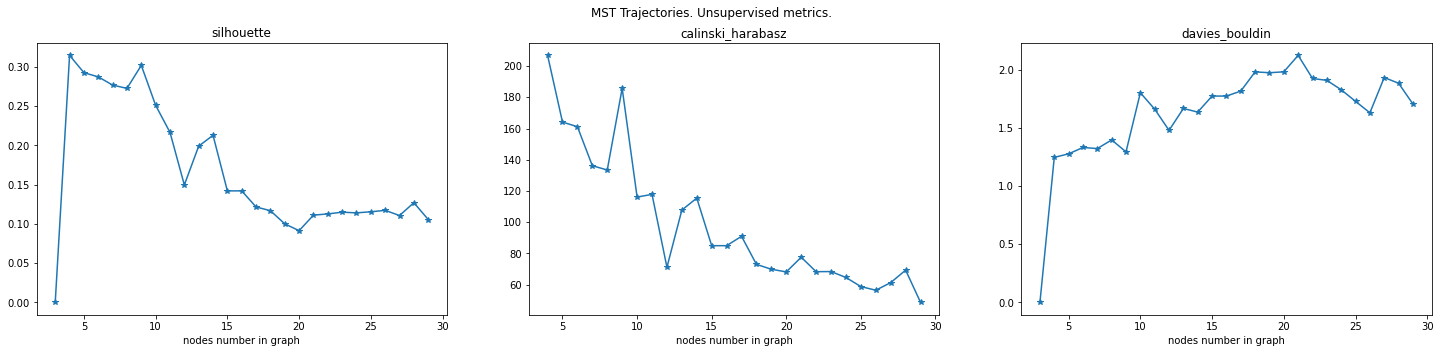

In [53]:
fig = plt.figure(figsize = (25,5) ) 
plt.suptitle('MST Trajectories. Unsupervised metrics.')

c = 0 
list_data_names = ['silhouette', 'calinski_harabasz', 'davies_bouldin'] #, 'inertia'  ]
subplots_number = len(list_data_names )
for data_name in list_data_names :
  #print()
  #print(   data_name ) 
  c+=1
  fig.add_subplot(1, subplots_number , c) 
  v = df_stat.loc[data_name,:]
  #v.plot()
  plt.plot(v,'-*')
  plt.title(data_name)
  plt.xlabel('nodes number in graph')
 
  #print(df_stat.columns[v.argmax()] )
  #print( v.sort_values().tail(3) )
plt.show()


## ElPiGraph

In [46]:


t0 = time.time()
df_stat = pd.DataFrame()
c = 0
fig = plt.figure(figsize = (25,10) )
for n_nodes in range(3,30): #  [2,25]: # range(0):
  c+=1
  tree_elpi = elpigraph.computeElasticPrincipalTree(X , NumNodes=n_nodes, 
      alpha=0.01,FinalEnergy='Penalized', StoreGraphEvolution = True )#,

  nodes_positions = tree_elpi[0]['NodePositions'] # ['AllNodePositions'][k]
  matrix_edges_weights = tree_elpi[0]['ElasticMatrix'] # ['AllElasticMatrices'][k]
  matrix_edges_weights = np.triu(matrix_edges_weights,1 )
  edges = np.array( np.nonzero(matrix_edges_weights), dtype = int ).transpose()

  g = igraph.Graph()
  g.add_vertices( len (nodes_positions ))
  g.add_edges(edges )
  vec_labels_by_branches = branch_labler( X , g, nodes_positions )
  case_id = n_nodes # 'n_nodes '+str(n_nodes) # Combined'+' Noise sigma' +str( sigma_noise ) + ' n_nodes_mst'+str(n_mst_nodes) + ' n_nodes' + str(k) + ' trial'+str(cc)
  s,df_stat = compare_clusterings(None,vec_labels_by_branches, X,  df_stat, case_id )
  df_stat.loc['n_branch pnts', case_id ] = np.sum(np.array(g.degree()) >= 3)
  df_stat.loc['n_clusters', case_id ] = len(np.unique(vec_labels_by_branches))
  df_stat.loc['n_components', case_id ] = len( list( g.components() ) )
  print('n_nodes=',n_nodes, time.time() - t0, 'seconds passed')

df_stat


Generating the initial configuration
Creating a chain in the 1st PC with 2 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
50 dimensions are being used
100.0 % of the original variance has been retained
The elastic matrix is being used. Edge configuration will be ignored
Computing EPG with  3  nodes on  447  points and  50  dimensions
Nodes =  2 

BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

0||3	340.7431	3	2	1	0	0	0	328.34	303.423	0.4231	0.4668	8.1477	4.2553	12.766	38.2981	0


0.051  seconds elapsed
n_nodes= 3 0.376941442489624 seconds passed
Generating the initial configuration
Creating a chain in the 1st PC with 2 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
50 dimensions are being used
100.0 % of the original variance has been retaine

Nodes =  2 3 4 5 6 7 8 9 10 11 12 13 

BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

1||14	177.8694	14	13	10	1	0	0	164.4694	160.7794	0.711	0.7175	9.8979	3.5021	49.0296	686.4147	0


0.9082  seconds elapsed
n_nodes= 14 5.728356599807739 seconds passed
Generating the initial configuration
Creating a chain in the 1st PC with 2 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
50 dimensions are being used
100.0 % of the original variance has been retained
The elastic matrix is being used. Edge configuration will be ignored
Computing EPG with  15  nodes on  447  points and  50  dimensions
Nodes =  2 3 4 5 6 7 8 9 10 11 12 13 14 

BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

1||15	175.9699	15	14	11	1	0	0	163.4239	160.3068	0.7128	0.7183	9.4192	3.1268	46.9027	703.5405	0


1.035  seconds elapsed
n_nodes=

Nodes =  2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 

BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

2||25	163.7659	25	24	19	2	0	0	153.2461	151.7724	0.7307	0.7333	7.8329	2.6869	67.1728	1679.3209	0


2.7191  seconds elapsed
n_nodes= 25 26.22998046875 seconds passed
Generating the initial configuration
Creating a chain in the 1st PC with 2 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
50 dimensions are being used
100.0 % of the original variance has been retained
The elastic matrix is being used. Edge configuration will be ignored
Computing EPG with  26  nodes on  447  points and  50  dimensions
Nodes =  2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 

BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

3||26	161.7573	26	25	18	3	0	0	150.8571	149.4414	0.7349	0.7374	8

,3,4,5,6,7,8,9,10,11,12,...,20,21,22,23,24,25,26,27,28,29
inertia,2.538245e+05,131760.117215,140498.187158,146394.649183,154105.309319,158039.899908,160835.938953,151574.502632,152021.186407,152433.181347,...,157660.380091,157242.044268,158178.451191,118409.709121,116889.446369,119657.648807,103893.882357,104290.088844,103813.342726,86265.687324
silhouette,0.000000e+00,0.312185,0.300676,0.284481,0.278648,0.273080,0.272023,0.280597,0.280154,0.279110,...,0.273426,0.273797,0.272495,0.141246,0.144837,0.138584,0.146616,0.143879,0.146638,0.154738
calinski_harabasz,inf,205.663829,179.065931,162.911857,143.652790,134.549430,128.351026,149.758015,148.665679,147.663847,...,135.407715,136.358583,134.237122,126.369139,129.449856,123.898771,105.828282,105.147632,105.967277,106.344070
davies_bouldin,0.000000e+00,1.273322,1.287757,1.397415,1.329555,1.389078,1.326871,1.331069,1.331321,1.342104,...,1.364033,1.351670,1.381851,1.542872,1.537290,1.549407,1.567610,1.570367,1.556328,1.662027
n_branch pnts,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,4.000000
n_clusters,1.000000e+00,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,5.000000,5.000000,5.000000,7.000000,7.000000,7.000000,9.000000
n_components,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Figure size 1800x720 with 0 Axes>

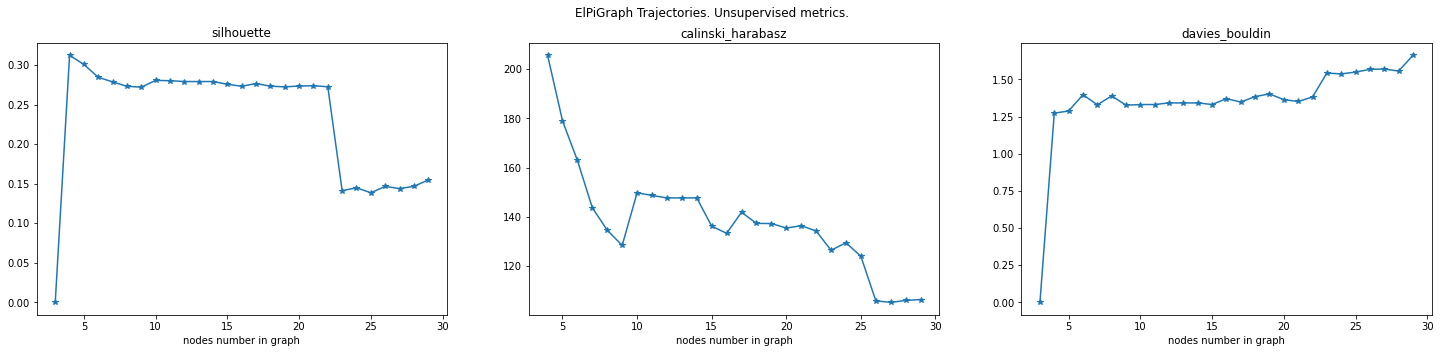

In [48]:
fig = plt.figure(figsize = (25,5) ) 
plt.suptitle('ElPiGraph Trajectories. Unsupervised metrics.')
c = 0 
list_data_names = ['silhouette', 'calinski_harabasz', 'davies_bouldin'] #, 'inertia'  ]
subplots_number = len(list_data_names )
for data_name in list_data_names :
  #print()
  #print(   data_name ) 
  c+=1
  fig.add_subplot(1, subplots_number , c) 
  v = df_stat.loc[data_name,:]
  #v.plot()
  plt.plot(v,'-*')
  plt.title(data_name)
  plt.xlabel('nodes number in graph')
 
  #print(df_stat.columns[v.argmax()] )
  #print( v.sort_values().tail(3) )
plt.show()


# MST plots trajectories for 3-20 nodes

colored by graph segments


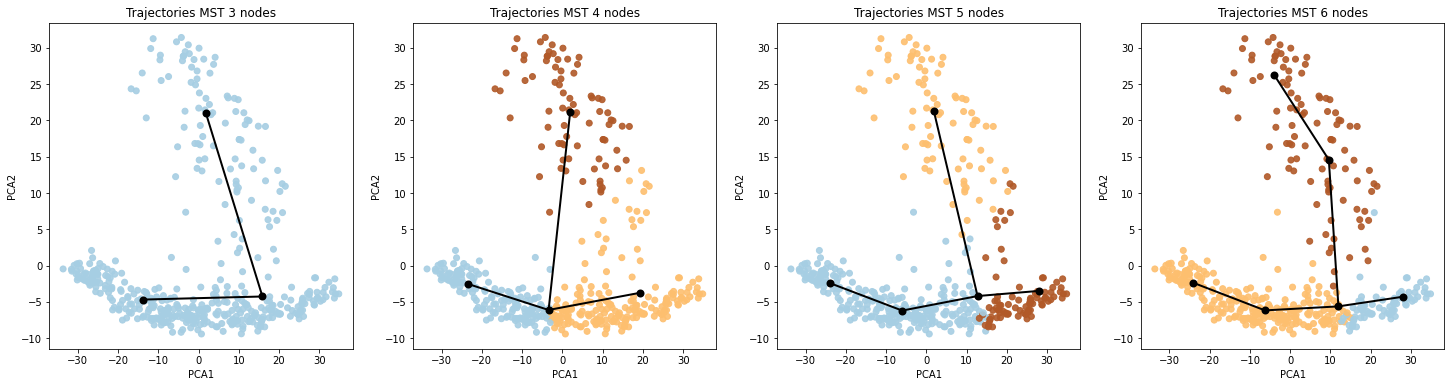

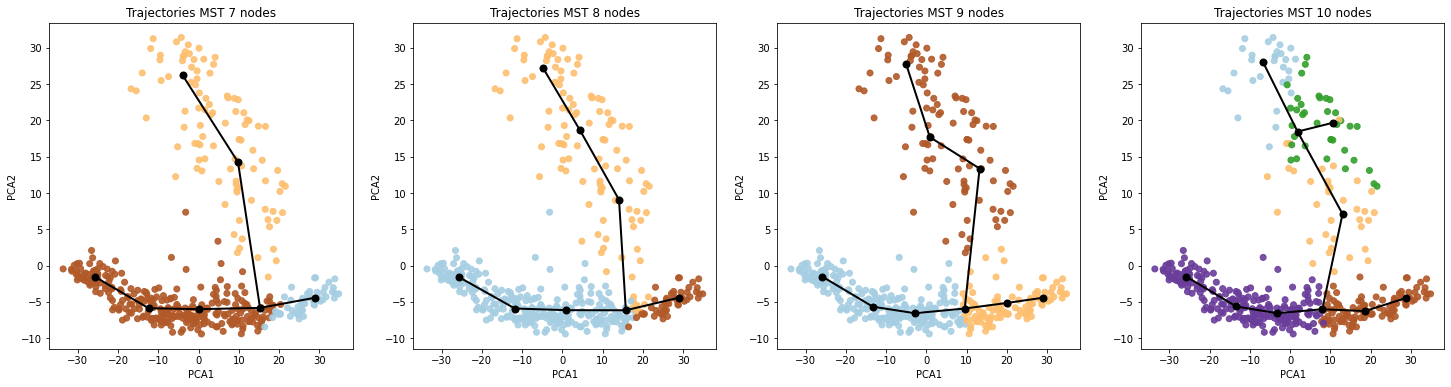

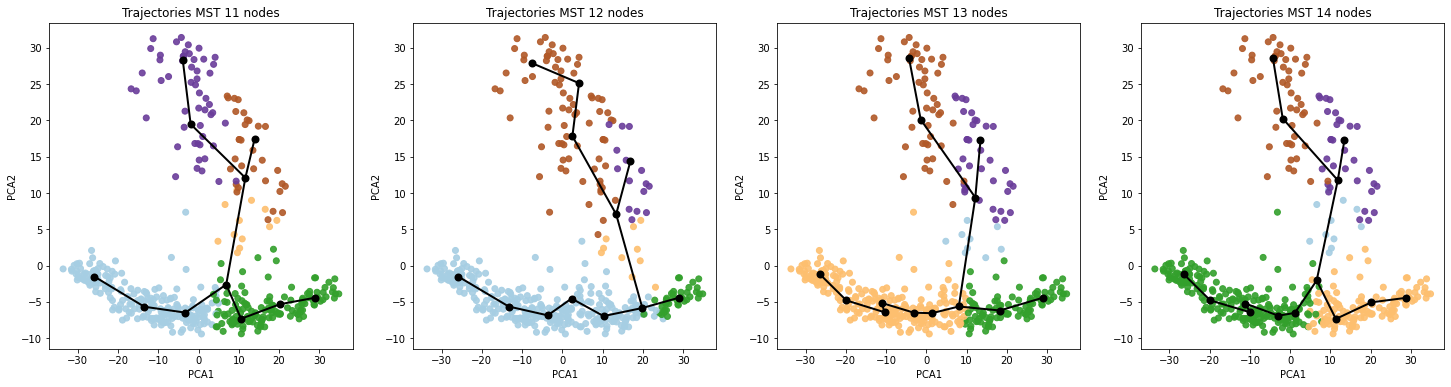

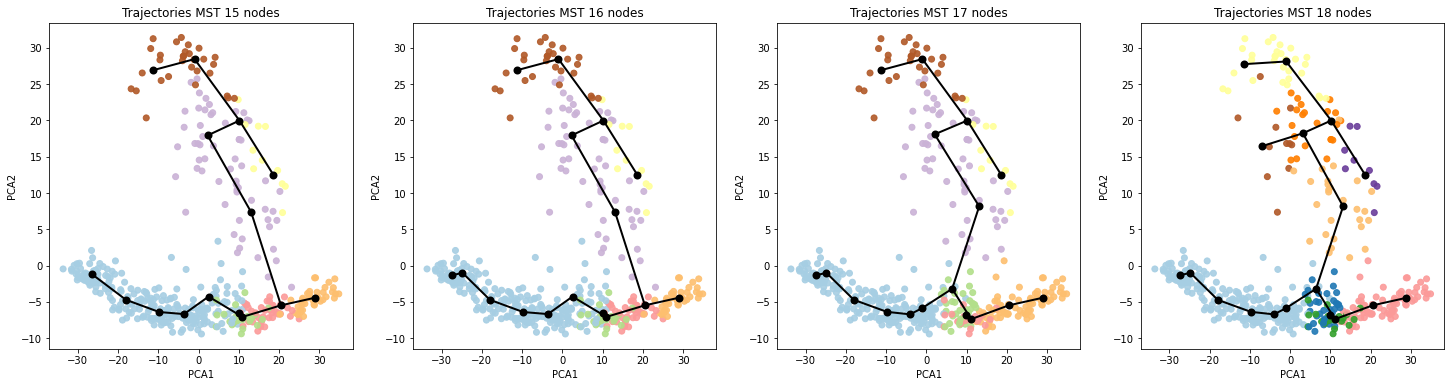

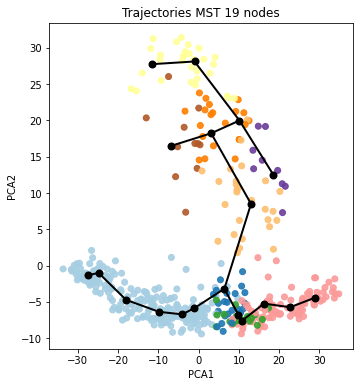

In [31]:

t0 = time.time()
c = 0
fig = plt.figure(figsize = (25,6) )
for n_nodes in range(3,20): #  [2,25]: # range(0):
  c+=1
  dict_result =  create_tree_by_cluster_knn_mst(X, n_clusters = n_nodes, n_neighbors=n_nodes)# - Calcuates a tree for given dataset, by kmeans+knn+mst
  edges =  dict_result['edges_mst']
  nodes_positions = dict_result['nodes_positions']

  g = igraph.Graph()
  g.add_vertices( len (nodes_positions ))
  g.add_edges(edges )
  vec_labels_by_branches = branch_labler( X , g, nodes_positions )
  #print('n_nodes',n_nodes,time.time() - t0, 'seconds passed')

  fig.add_subplot(1,4,c)
  plot_graph(edges, nodes_positions, data = X, data_color = vec_labels_by_branches )
  #plt.title(n_clusters)
  plt.title('Trajectories MST ' + str(n_nodes)+' nodes');
  #plt.show()  

  if c%4 == 0:
    plt.show()
    fig = plt.figure(figsize = (25,6) )
    c = 0



# ElPiGraph Plots trajectories for 3-20 nodes

colored by graph segments

Generating the initial configuration
Creating a chain in the 1st PC with 2 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
50 dimensions are being used
100.0 % of the original variance has been retained
The elastic matrix is being used. Edge configuration will be ignored
Computing EPG with  3  nodes on  447  points and  50  dimensions
Nodes =  2 

BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

0||3	340.7431	3	2	1	0	0	0	328.34	303.423	0.4231	0.4668	8.1477	4.2553	12.766	38.2981	0


0.0455  seconds elapsed
Generating the initial configuration
Creating a chain in the 1st PC with 2 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
50 dimensions are being used
100.0 % of the original variance has been retained
The elastic matrix is being used. Edge co

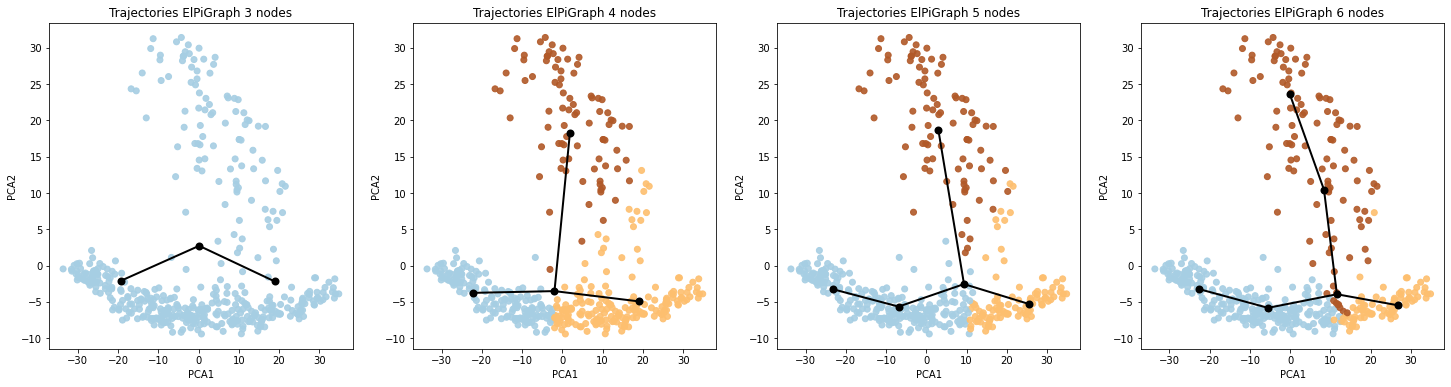

Generating the initial configuration
Creating a chain in the 1st PC with 2 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
50 dimensions are being used
100.0 % of the original variance has been retained
The elastic matrix is being used. Edge configuration will be ignored
Computing EPG with  7  nodes on  447  points and  50  dimensions
Nodes =  2 3 4 5 6 

BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

1||7	212.1668	7	6	3	1	0	0	191.6255	177.6379	0.6633	0.6879	14.4597	6.0816	42.5715	298.0006	0


0.2896  seconds elapsed
Generating the initial configuration
Creating a chain in the 1st PC with 2 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
50 dimensions are being used
100.0 % of the original variance has been retained
The elastic matrix is being

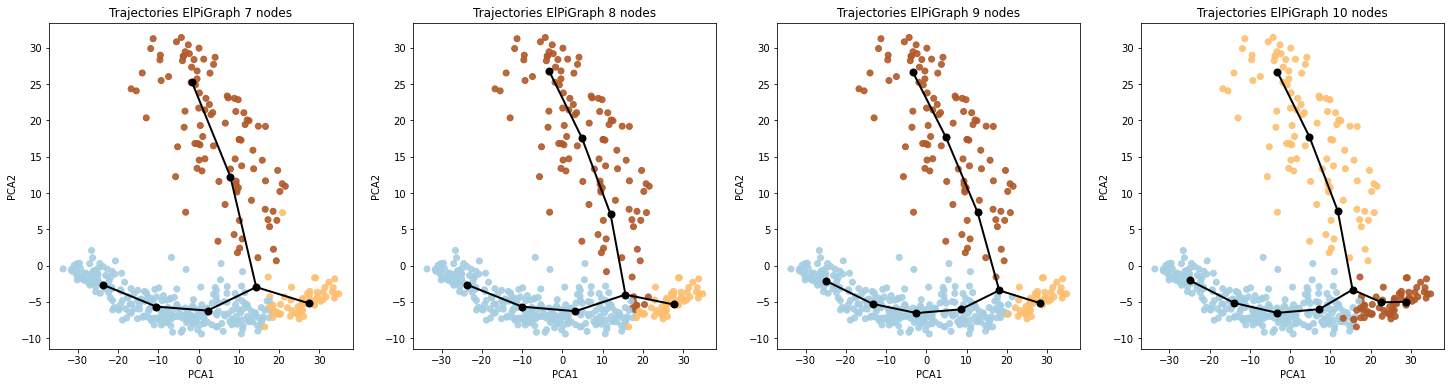

Generating the initial configuration
Creating a chain in the 1st PC with 2 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
50 dimensions are being used
100.0 % of the original variance has been retained
The elastic matrix is being used. Edge configuration will be ignored
Computing EPG with  11  nodes on  447  points and  50  dimensions
Nodes =  2 3 4 5 6 7 8 9 10 

BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

1||11	186.9832	11	10	7	1	0	0	171.3287	165.66	0.699	0.7089	11.3058	4.3486	47.8348	526.1833	0


0.5983  seconds elapsed
Generating the initial configuration
Creating a chain in the 1st PC with 2 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
50 dimensions are being used
100.0 % of the original variance has been retained
The elastic matri

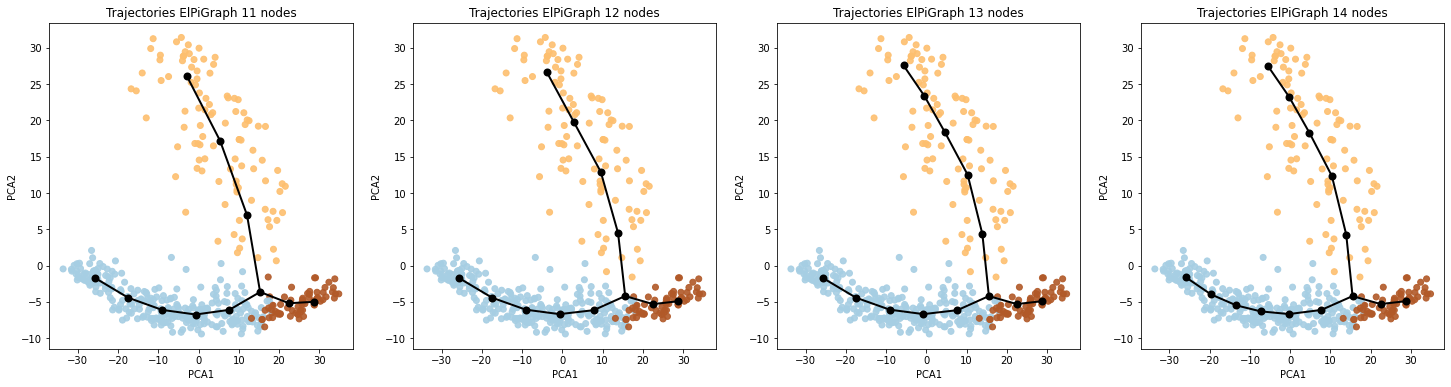

Generating the initial configuration
Creating a chain in the 1st PC with 2 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
50 dimensions are being used
100.0 % of the original variance has been retained
The elastic matrix is being used. Edge configuration will be ignored
Computing EPG with  15  nodes on  447  points and  50  dimensions
Nodes =  2 3 4 5 6 7 8 9 10 11 12 13 14 

BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

1||15	175.9699	15	14	11	1	0	0	163.4239	160.3068	0.7128	0.7183	9.4192	3.1268	46.9027	703.5405	0


1.0128  seconds elapsed
Generating the initial configuration
Creating a chain in the 1st PC with 2 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
50 dimensions are being used
100.0 % of the original variance has been retained
Th

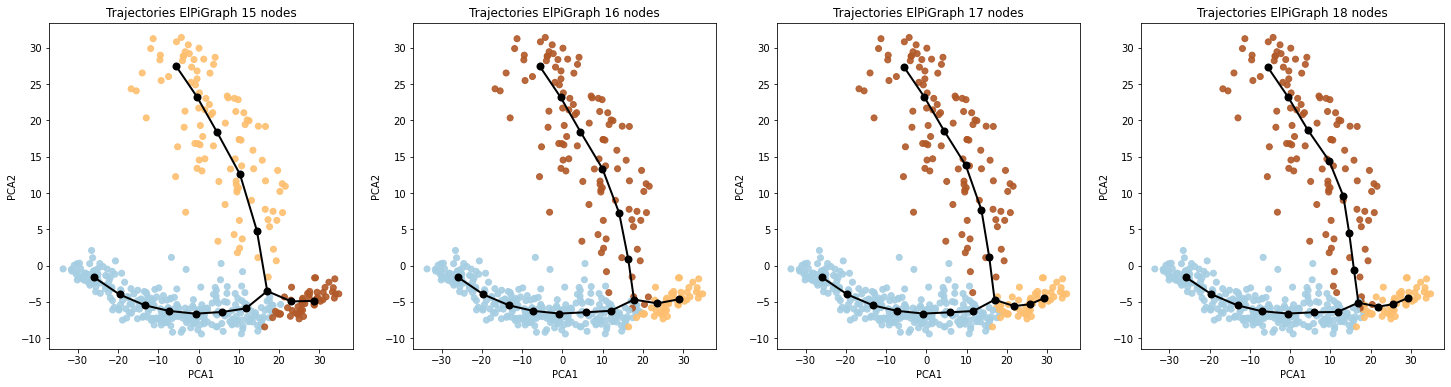

Generating the initial configuration
Creating a chain in the 1st PC with 2 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
50 dimensions are being used
100.0 % of the original variance has been retained
The elastic matrix is being used. Edge configuration will be ignored
Computing EPG with  19  nodes on  447  points and  50  dimensions
Nodes =  2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 

BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

1||19	169.8638	19	18	15	1	0	0	159.1055	156.844	0.7204	0.7244	8.1822	2.576	48.9446	929.9475	0


1.5447  seconds elapsed


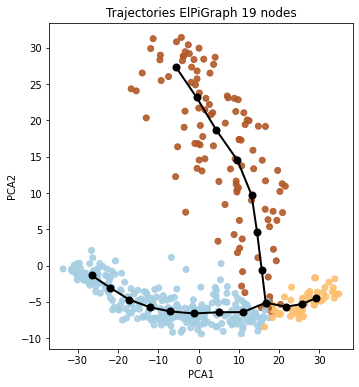

In [32]:
t0 = time.time()
c = 0
fig = plt.figure(figsize = (25,6) )
for n_nodes in range(3,20): #  [2,25]: # range(0):
  c+=1
  tree_elpi = elpigraph.computeElasticPrincipalTree(X , NumNodes=n_nodes, 
      alpha=0.01,FinalEnergy='Penalized', StoreGraphEvolution = True )#,

  nodes_positions = tree_elpi[0]['NodePositions'] # ['AllNodePositions'][k]
  matrix_edges_weights = tree_elpi[0]['ElasticMatrix'] # ['AllElasticMatrices'][k]
  matrix_edges_weights = np.triu(matrix_edges_weights,1 )
  edges = np.array( np.nonzero(matrix_edges_weights), dtype = int ).transpose()

  g = igraph.Graph()
  g.add_vertices( len (nodes_positions ))
  g.add_edges(edges )
  vec_labels_by_branches = branch_labler( X , g, nodes_positions )
  #print('n_nodes',n_nodes,time.time() - t0, 'seconds passed')

  fig.add_subplot(1,4,c)
  plot_graph(edges, nodes_positions, data = X, data_color = vec_labels_by_branches )
  #plt.title(n_clusters)
  plt.title('Trajectories ElPiGraph ' + str(n_nodes)+' nodes');
  #plt.show()  

  if c%4 == 0:
    plt.show()
    fig = plt.figure(figsize = (25,6) )
    c = 0
